# Example usage for clustering in "movekit"

In [1]:
import movekit as mkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

/home/lukas/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


### Read in CSV file and preprocess

In [2]:
# Enter path to CSV file
path = "./datasets/fish-5.csv"

In [3]:
# Read in CSV file and preprocess
data = mkit.read_data(path)
preprocessed_data = mkit.preprocess(data)

Total number of missing values =  0
y            0
x            0
animal_id    0
time         0
dtype: int64


In [4]:
# converting positional data into scale, defined by user
mkit.convert_measueres(preprocessed_data, x_min = 0, x_max = 100, y_min = 0, y_max = 100).head()

,time,animal_id,x,y
0,1,312,49.663862,84.937627
1,1,511,44.688738,87.375033
2,1,607,47.555424,82.312218
3,1,811,55.281665,83.650358
4,1,905,44.134850,92.457755


### Detecting outliers
Function performs detection of outliers, based on user's criteria, regarding features, method and share of outliers.

In [5]:
# Extracting features for later use
feats = mkit.extract_features(preprocessed_data, fps = 3)

In [6]:
feats

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped
0,1,312,49.663862,84.937627,0.000000,0.043153,0.007734,0.000000,1
1,2,312,49.666681,84.851367,0.086306,0.050887,0.007734,-88.128385,1
2,3,312,49.666681,84.785013,0.066354,0.066377,0.015490,-90.000000,1
3,4,312,49.665271,84.738565,0.046469,0.048677,-0.017700,-91.738013,1
4,5,312,49.663862,84.705388,0.033207,0.033991,-0.014686,-92.432502,1
5,6,312,49.661043,84.683270,0.022297,0.023662,-0.010329,-97.262745,1
6,7,312,49.661043,84.667787,0.015483,0.016280,-0.007383,-90.000000,1
7,8,312,49.661043,84.656728,0.011059,0.017892,0.001612,-90.000000,1
8,9,312,49.666681,84.630187,0.027134,0.020804,0.002912,-78.008390,1
9,10,312,49.676546,84.608069,0.024219,0.028102,0.007298,-65.960864,1


In [7]:
outs = mkit.outlier_detection(feats)

# printing all rows where outliers are present
outs[outs.loc[:,"outlier"] == 1]

,time,animal_id,outlier,x,y,distance,average_speed,average_acceleration,direction,stopped
1876,877,511,1,64.024072,7.887287,0.645740,0.645586,0.012156,-1.570202,0
1989,990,511,1,84.668724,35.864372,0.989962,0.974461,-0.011696,85.181662,0
1990,991,511,1,84.777247,36.784482,0.926487,0.934912,-0.039548,83.273314,0
1991,992,511,1,84.925232,37.660356,0.888287,0.895494,-0.039419,80.410027,0


In [8]:
# same function, different parameters
other_outs = mkit.outlier_detection(dataset = feats, features = ["average_speed", "average_acceleration"], contamination = 0.05, n_neighbors = 8, method = "median", metric = "euclidean")

# printing all rows where outliers are present
other_outs[other_outs.loc[:,"outlier"] == 1].head()

,time,animal_id,outlier,x,y,distance,average_speed,average_acceleration,direction,stopped
697,698,312,1,14.463095,47.140140,0.724021,0.722229,0.043150,-71.265096,0
698,699,312,1,14.718194,46.414669,0.769015,0.773842,0.051613,-70.626723,0
699,700,312,1,15.001480,45.636114,0.828491,0.819444,0.045602,-70.005491,0
700,701,312,1,15.300269,44.828807,0.860826,0.849685,0.030241,-69.690192,0
701,702,312,1,15.601877,44.023711,0.859737,0.850136,0.000452,-69.462855,0


### Group-level Analysis

Below we perform Analysis on Group-Level. This consists of:
- A dynamic time warping matrix, 
- A clustering over time based on absolute features,
- The heading difference of each animal with respect to the current centroid
- The group - polarization for each timestep. 

#### Obtain a matrix, based on dynamic time warping
Each Animal-ID is displayed in the indices, the entries reflect the euclidean distances of the animal's trajectories.

In [9]:
mkit.dtw_matrix(preprocessed_data)

,312,511,607,811,905
312,0.000000,5559.971244,5873.940640,8235.343344,7221.072340
511,5559.971244,0.000000,5119.824950,8667.471335,4258.767686
607,5874.377835,5119.822061,0.000000,7491.758830,7215.670756
811,8235.343344,8667.471335,7491.758830,0.000000,6826.692241
905,7221.068698,4258.767686,7215.670756,6826.692241,0.000000


#### Time series clustering for absolute features
Function can also be executed without extracted features, performing a standard feature-extraction before.

In [10]:
feats = mkit.extract_features(preprocessed_data)

In [11]:
mkit.ts_cluster(feats, 3).head(13)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,cluster,ClustCenter,centroid_distance,centroid_average_speed,centroid_average_acceleration,centroid_direction,centroid_stopped
0,1,312,49.663862,84.937627,0.000000,0.046467,-0.004028,0.000000,1,2,"[0.0, 0.02532879420014326, -0.0019764981658822...",0.000000,0.025329,-0.001976,0.000000,1.0
1,2,312,49.666681,84.851367,0.086306,0.042439,-0.004028,-88.128385,1,2,"[0.04779586109497597, 0.023352296034260988, -0...",0.047796,0.023352,-0.001976,-7.900269,1.0
2,3,312,49.666681,84.785013,0.066354,0.038588,-0.004028,-90.000000,1,2,"[0.036494735910828524, 0.02145377606448439, -0...",0.036495,0.021454,-0.001976,0.000000,1.0
3,4,312,49.665271,84.738565,0.046469,0.035147,-0.004028,-91.738013,1,2,"[0.024340512839601654, 0.019739717508604312, -...",0.024341,0.019740,-0.001976,-0.869007,1.0
4,5,312,49.663862,84.705388,0.033207,0.034257,-0.004028,-92.432502,1,2,"[0.018012861155310162, 0.019311773053556282, -...",0.018013,0.019312,-0.001976,43.783749,1.0
5,6,312,49.661043,84.683270,0.022297,0.033253,-0.004028,-97.262745,1,2,"[0.013469805204849625, 0.01930484047255212, -0...",0.013470,0.019305,-0.001976,-102.467449,1.0
6,7,312,49.661043,84.667787,0.015483,0.036548,-0.003851,-90.000000,1,2,"[0.010062656245824815, 0.02184504608307918, -0...",0.010063,0.021845,-0.001899,-98.836077,1.0
7,8,312,49.661043,84.656728,0.011059,0.032483,-0.003441,-90.000000,1,2,"[0.007741307617443738, 0.020300148261123457, -...",0.007741,0.020300,-0.001714,-90.000000,1.0
8,9,312,49.666681,84.630187,0.027134,0.028208,-0.000890,-78.008390,1,2,"[0.015888217413172052, 0.018712951045176382, -...",0.015888,0.018713,-0.000428,-2.840272,1.0
9,10,312,49.676546,84.608069,0.024219,0.026307,-0.001004,-65.960864,1,2,"[0.019242447243514624, 0.018740522273941004, -...",0.019242,0.018741,-0.000007,-37.439888,1.0


#### Getting the heading difference
Calculate the difference in degrees between the animal's direction and the centroid's direction for each timestep. Stronger gain in y gives positive difference, weaker gain in y gives negative difference, since constant y is defined to be 0 degrees.

In [12]:
mkit.get_heading_difference(feats).head(13)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,x_centroid,y_centroid,medoid,distance_to_centroid,centroid_direction,heading_difference
0,1,312,49.663862,84.937627,0.000000,0.046467,-0.004028,0.000000,1,48.265,86.147,312,1.849,NaN,NaN
1,2,312,49.666681,84.851367,0.086306,0.042439,-0.004028,-88.128385,1,48.267,86.145,312,1.906,-45.000000,-43.128385
2,3,312,49.666681,84.785013,0.066354,0.038588,-0.004028,-90.000000,1,48.269,86.148,312,1.952,56.309932,-146.309932
3,4,312,49.665271,84.738565,0.046469,0.035147,-0.004028,-91.738013,1,48.269,86.157,312,1.990,90.000000,178.261987
4,5,312,49.663862,84.705388,0.033207,0.034257,-0.004028,-92.432502,1,48.269,86.168,312,2.021,90.000000,177.567498
5,6,312,49.661043,84.683270,0.022297,0.033253,-0.004028,-97.262745,1,48.268,86.182,312,2.046,94.085617,168.651639
6,7,312,49.661043,84.667787,0.015483,0.036548,-0.003851,-90.000000,1,48.268,86.200,312,2.071,90.000000,-180.000000
7,8,312,49.661043,84.656728,0.011059,0.032483,-0.003441,-90.000000,1,48.267,86.220,312,2.095,92.862405,177.137595
8,9,312,49.666681,84.630187,0.027134,0.028208,-0.000890,-78.008390,1,48.268,86.241,312,2.133,87.273689,-165.282079
9,10,312,49.676546,84.608069,0.024219,0.026307,-0.001004,-65.960864,1,48.270,86.262,312,2.171,84.559668,-150.520532


#### Computing polarization
Computing polarization of animals for each timestep. Value is between 0 and 1

In [66]:
range(len(pol.index.values.tolist()))

range(0, 5000)

In [45]:
pol = 
mkit.compute_polarization(feats)


#### Producing a voronoi diagram
Each timestep gets a voronoi object as well as the area of the voronoi - shape. Infinity, if respective animal is outmost in swarm.

Voronoi object contains the following attributes:

`.points`
- Coordinates of input points.

`.vertices`
- Coordinates of the Voronoi vertices.

`ridge_points`
- Indices of the points between which each Voronoi ridge lies.

`ridge_vertices`
- Indices of the Voronoi vertices forming each Voronoi ridge.

`regions`
- Indices of the Voronoi vertices forming each Voronoi region. -1 indicates vertex outside the Voronoi diagram.

`point_region`
- Index of the Voronoi region for each input point. If qhull option “Qc” was not specified, the list will contain -1 for points that are not associated with a Voronoi region.

`furthest_site`
- True if this was a furthest site triangulation and False if not.



In [14]:
# Obtaining a dataframe with the voronoi area as well as a list of voronoi objects
vor_area, vor_objects = mkit.voronoi_diagram(preprocessed_data)

In [15]:
# Showing list of voronoi objects. using the properties above, one may compute quantities of interest.
vor_objects[0:5]

In [16]:
# Showing the first entries with the respective voronoi area
vor_area.head(13)

,time,animal_id,x,y,area_voronoi
0,1,312,49.663862,84.937627,49.458071
1,2,312,49.666681,84.851367,48.232874
2,3,312,49.666681,84.785013,47.247582
3,4,312,49.665271,84.738565,46.463537
4,5,312,49.663862,84.705388,45.799651
5,6,312,49.661043,84.683270,45.237655
6,7,312,49.661043,84.667787,44.687728
7,8,312,49.661043,84.656728,44.156746
8,9,312,49.666681,84.630187,43.458766
9,10,312,49.676546,84.608069,42.876693


#### Plotting exemplary voronoi diagram of 3rd timestep. 

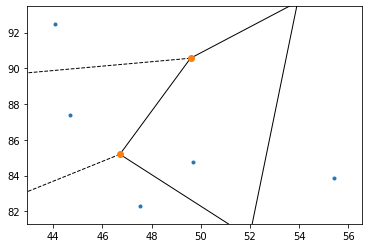

In [17]:
# This shows the voronoi plot for the 4th record in the captures-row
voronoi_plot_2d(vor_objects[3])
plt.show()